In [76]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [77]:
iris_data = load_iris()

In [78]:
data = iris_data.data

In [79]:
new_target = [1 if a>1 else 0 for a in iris_data.target ]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(data, new_target,test_size = 0.2)

In [81]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
predictions = tree_clf.predict(X_test)

In [83]:
confusion_matrix(y_test,predictions)

array([[17,  1],
       [ 1, 11]])

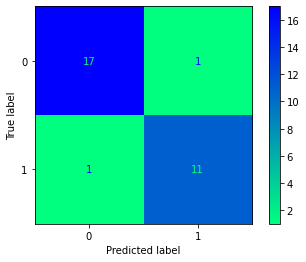

In [84]:
plot_confusion_matrix(tree_clf, X_test, y_test,cmap="winter_r")
plt.show()

In [85]:
cross_validation_result = cross_validate(tree_clf, data, new_target,cv = 10)

In [86]:
cross_validation_result

{'fit_time': array([0.00231385, 0.00098205, 0.00084472, 0.00107503, 0.00050688,
        0.00054693, 0.000736  , 0.00047994, 0.00061107, 0.00059295]),
 'score_time': array([0.00075507, 0.00063801, 0.00054312, 0.00036097, 0.00031114,
        0.00033402, 0.00033092, 0.00030899, 0.00034308, 0.00063515]),
 'test_score': array([1.        , 0.93333333, 1.        , 0.93333333, 1.        ,
        0.93333333, 1.        , 0.86666667, 0.93333333, 1.        ])}

In [87]:
cross_validation_result.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

In [88]:
cross_validation_score = cross_validation_result['test_score']

In [91]:
cross_validation_score

array([1.        , 0.93333333, 1.        , 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 1.        ])

In [89]:
avg_accuracy = np.average(cross_validation_score)

In [90]:
print(f"The average accuracy is {avg_accuracy}")

The average accuracy is 0.96
